In [1]:
import pandas as pd
df = pd.read_excel('员工离职预测模型.xlsx')
df.head()

,工资,满意度,考核得分,工程数量,月工时,工龄,离职
0,低,3.8,0.53,2,157,3,1
1,中,8.0,0.86,5,262,6,1
2,中,1.1,0.88,7,272,4,1
3,低,7.2,0.87,5,223,5,1
4,低,3.7,0.52,2,159,3,1


In [2]:
df = df.replace({'工资': {'低': 0, '中': 1, '高': 2}})
df.head()

,工资,满意度,考核得分,工程数量,月工时,工龄,离职
0,0,3.8,0.53,2,157,3,1
1,1,8.0,0.86,5,262,6,1
2,1,1.1,0.88,7,272,4,1
3,0,7.2,0.87,5,223,5,1
4,0,3.7,0.52,2,159,3,1


In [3]:
X = df.drop(columns='离职') 
y = df['离职']

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [5]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=3, random_state=123) 
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=123)

In [6]:
y_pred = model.predict(X_test)
print(y_pred[0:100])

[0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 1 0
 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 1 0 0 0]


In [7]:
# 通过构造DataFrame进行对比
a = pd.DataFrame()  # 创建一个空DataFrame 
a['预测值'] = list(y_pred)
a['实际值'] = list(y_test)
a.head()

,预测值,实际值
0,0,0
1,0,0
2,1,1
3,0,0
4,0,0


In [8]:
# 如果要查看整体的预测准确度，可以采用如下代码：
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)
print(score)

0.9573333333333334


In [9]:
# 或者用模型自带的score函数查看预测准确度
model.score(X_test, y_test)

0.9573333333333334

In [10]:
y_pred_proba = model.predict_proba(X_test)
print(y_pred_proba[0:5])

[[0.98526077 0.01473923]
 [0.98526077 0.01473923]
 [0.28600613 0.71399387]
 [0.98526077 0.01473923]
 [0.92283214 0.07716786]]


In [11]:
b = pd.DataFrame(y_pred_proba, columns=['不离职概率', '离职概率']) 
b.head()

,不离职概率,离职概率
0,0.985261,0.014739
1,0.985261,0.014739
2,0.286006,0.713994
3,0.985261,0.014739
4,0.922832,0.077168


In [12]:
y_pred_proba[:,1]

array([0.01473923, 0.01473923, 0.71399387, ..., 0.01473923, 0.94594595,
       0.01473923])

In [13]:
from sklearn.metrics import roc_curve
fpr, tpr, thres = roc_curve(y_test, y_pred_proba[:,1])

In [14]:
a = pd.DataFrame()  # 创建一个空DataFrame 
a['阈值'] = list(thres)
a['假警报率'] = list(fpr)
a['命中率'] = list(tpr)
a

,阈值,假警报率,命中率
0,inf,0.000000,0.000000
1,1.000000,0.000000,0.247110
2,0.945946,0.008232,0.677746
3,0.713994,0.038128,0.942197
4,0.077168,0.159879,0.969653
5,0.059406,0.171577,0.972543
6,0.045763,0.240035,0.976879
7,0.014739,1.000000,1.000000


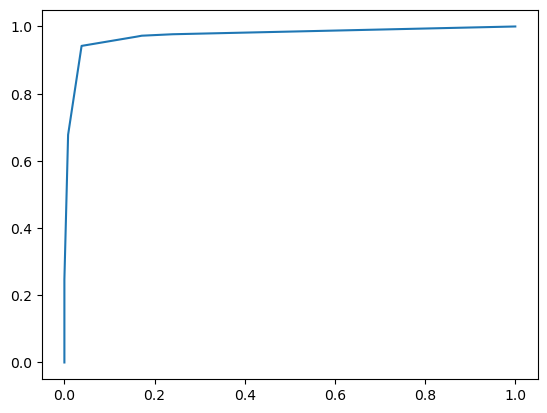

In [15]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr)
plt.show()

In [16]:
from sklearn.metrics import roc_auc_score
score = roc_auc_score(y_test, y_pred_proba[:,1])
print(score)

0.9736722483245008


In [17]:
model.feature_importances_

array([0.        , 0.59810862, 0.14007392, 0.10638659, 0.00456495,
       0.15086592])

In [18]:
# 通过DataFrame进行展示，并根据重要性进行倒序排列
features = X.columns  # 获取特征名称
importances = model.feature_importances_  # 获取特征重要性

# 通过二维表格形式显示
importances_df = pd.DataFrame()
importances_df['特征名称'] = features
importances_df['特征重要性'] = importances
importances_df.sort_values('特征重要性', ascending=False)

,特征名称,特征重要性
1,满意度,0.598109
5,工龄,0.150866
2,考核得分,0.140074
3,工程数量,0.106387
4,月工时,0.004565
0,工资,0.000000


In [19]:
# 1.如果不用显示中文，那么通过如下代码即可：
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(model, out_file=None, class_names=['0', '1'])
graph = graphviz.Source(dot_data)


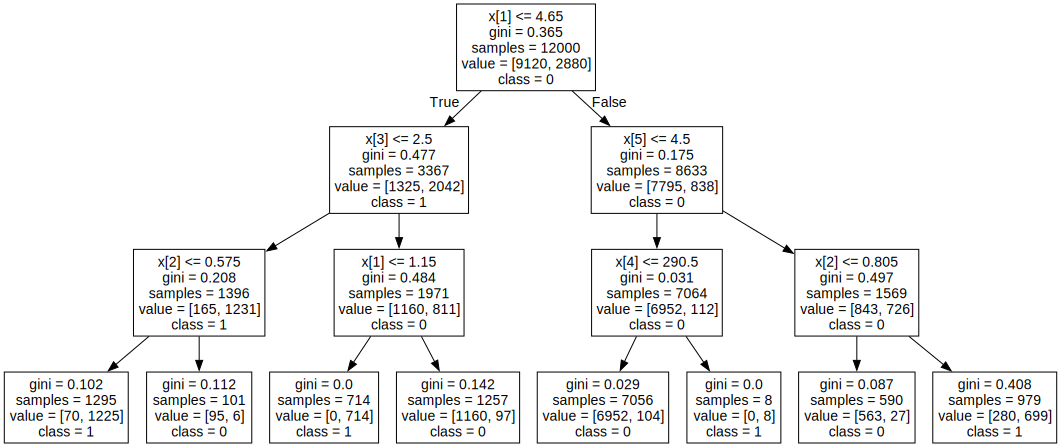

In [20]:
graph  # 在Jupyter Notebook中可以直接输入变量名查看可视化图片

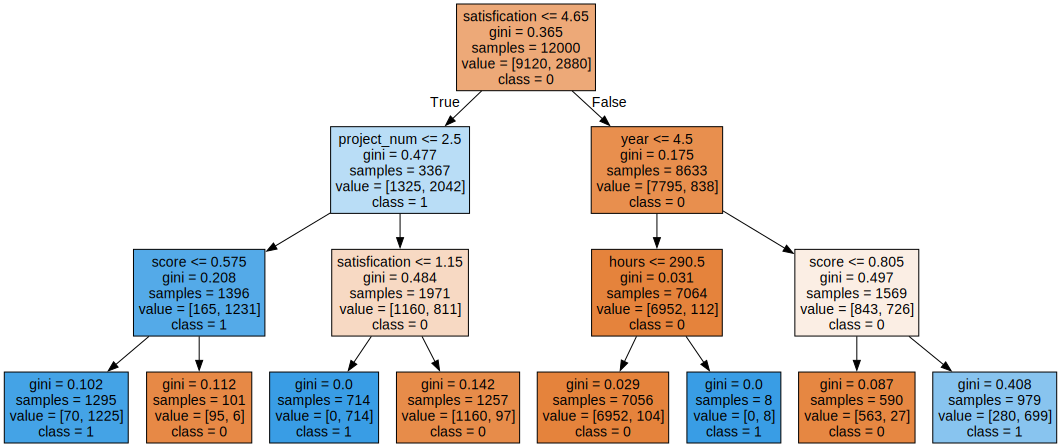

In [21]:
# 添加名称（feature_names）和填充颜色（filled=True）
dot_data = export_graphviz(model, out_file=None, feature_names=['income', 'satisfication', 'score', 'project_num', 'hours', 'year'], class_names=['0', '1'], filled=True)  
graph = graphviz.Source(dot_data)

graph

In [23]:
# 2.如果想显示中文，需要使用如下代码
from sklearn.tree import export_graphviz
import graphviz
import os  # 以下这两行是手动进行环境变量配置，防止在本机环境的变量部署失败
os.environ['PATH'] = os.pathsep + r'D:\Software\Graphviz\bin'

# 生成dot_data
dot_data = export_graphviz(model, out_file=None, feature_names=X_train.columns, class_names=['不离职', '离职'], rounded=True, filled=True)

# 将生成的dot_data内容导入到txt文件中
f = open('dot_data.txt', 'w')
f.write(dot_data)
f.close()

# 修改字体设置，避免中文乱码！
import re  #引入正则表达式库re，为之后的替换字体做准备
f_old = open('dot_data.txt', 'r')
f_new = open('dot_data_new.txt', 'w', encoding='utf-8')#支持中文显示的utf-8编码

#替换原来dot_data.txt的默认字体格式，替换成SimHei即黑体格式
for line in f_old:
    if 'fontname' in line:
        font_re = 'fontname=(.*?)]'
        old_font = re.findall(font_re, line)[0]
        line = line.replace(old_font, 'SimHei')
    f_new.write(line) #存放到dot_data_new.txt
f_old.close()
f_new.close()

# 调用os.system()系统函数来使用graphviz插件，以PNG的图片形式存储生成的可视化文件
os.system('dot -Tpng dot_data_new.txt -o 决策树模型.png')  
print('决策树模型.png已经保存在代码所在文件夹！')

# 以PDF的形式存储生成的可视化文件
os.system('dot -Tpdf dot_data_new.txt -o 决策树模型.pdf')  
print('决策树模型.pdf已经保存在代码所在文件夹！')

决策树模型.png已经保存在代码所在文件夹！
决策树模型.pdf已经保存在代码所在文件夹！
